# JWST Transit Analysis for K2-18b
#Autor: [Dragoljub Perišić]
Opis: Ovaj notebook vizualizuje i analizira JWST podatke o tranzitu za egzoplanetu K2-18b, koristeći metodu tranzita.

Uključeni podaci:

Vremenske serije sa MIRI P750L i NIRISS GR700XD
Krive svetlosti bele boje (white-light curves) i izdvojeni spektri
Svi fajlovi moraju biti u istom folderu kao i ovaj beležnik.

Ovaj notebook analizira podatke sa JWST (Svemirski teleskop Džejms Veb) o tranzitnoj spektroskopiji za egzoplanetu K2-18b, sub-Neptun koji se nalazi 124 svetlosne godine daleko u sazvežđu Lava. K2-18b orbitira unutar nastanjive zone svoje matične zvezde, M-patuljka, i privukla je pažnju naučne zajednice zbog potencijalne detekcije biosignatura u njenoj atmosferi. Analizirani podaci uključuju transmisione spektre snimljene tokom planetarnih tranzita, koji pružaju uvid u sastav i strukturu atmosfere planete.

Kôd koristi uobičajene naučne biblioteke u Pythonu (kao što su NumPy i Matplotlib), ali ne i petitRADTRANS (jedini rezultati sa tom bibliotekom dobijeni su na Linux OS), alat za radijativni transfer specijalizovan za atmosfere egzoplaneta.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
from astropy.time import Time
from astropy.table import Table
import os

## Učitavanje i prikazivanje krivih svetlosti bele boje

Fajl sadrži podatke iz JWST MIRI instrumenta (Mid-Infrared Instrument), tačnije iz posmatranja sa slitless prism modom u okviru posmatračke kampanje jw 02722 U pitanju je white light curve za egzoplanetu K2-18b , što znači da je ukupan tok svetlosti (integral preko talasne dužine) meren tokom vremena dok je planeta prolazila ispred svoje zvezde (tranzit).
Sadržaj fajla:
MJD – Modifikovani Julijanski datum: predstavlja vreme posmatranja u astronomskom standardu vremena.
whitelight_flux – Tok bele svetlosti (integralna svetlost preko celog spektra): pokazuje ukupnu količinu svetlosti zvezde u svakom trenutku merenja, uključujući efekat tranzita planete.
Opis:
Ovi podaci se koriste za izradu light curve grafikona – krive svetlosti – koji otkriva prisustvo i karakteristike tranzita. Pad u fluksu tokom tranzita ukazuje na to da planeta blokira deo svetlosti svoje zvezde. Ova konkretna serija dolazi iz MIRI instrumenta, koji meri u srednje-infracrvenom delu spektra i može dati informacije o dubokim slojevima atmosfere K2-18b, uključujući eventualno prisustvo oblaka, aerosola ili molekula poput metana (CH₄) ili ugljen-dioksida (CO₂).



Drugi fajl sadrži podatke iz instrumenta JWST NIRISS (Near Infrared Imager and Slitless Spectrograph), u modu CLEAR / GR700 XD, koji je korišćen za snimanje tranzita egzoplanete K2-18b. Reč je o white light curve podacima, tj. ukupnom svetlosnom toku integrisanom preko celog spektra posmatranog instrumentom.

Sadržaj fajla:
MJD – Modifikovani Julijanski datum: predstavlja tačne vremenske tačke kada su posmatranja izvršena.
whitelight_flux – Tok bele svetlosti (integrisani tok): pokazuje ukupnu količinu zvezdane svetlosti u datom trenutku, uključujući padove izazvane tranzitom planete ispred zvezde.
Opis:
Ovaj set podataka omogućava izradu vremenske serije ("light curve") koja jasno prikazuje kako planeta K2-18b blokira deo svetlosti svoje zvezde tokom tranzita. Instrument NIRISS pokriva bliski infracrveni deo spektra, što je ključno za proučavanje molekula u atmosferi planete poput vodene pare (H₂O).
Zajedno sa MIRI podacima (srednje-infracrveni spektar), NIRISS svetlosna kriva doprinosi višespektralnoj analizi tranzita.



Treći fajl sadrži još jedan set podataka iz instrumenta JWST MIRI (Mid-Infrared Instrument), u modu P750L slitless prism, i predstavlja drugu posetu (Visit 2) posmatranju tranzita egzoplanete K2-18b.

Sadržaj fajla:
MJD – Modifikovani Julijanski datum: vreme merenja izraženo u astronomskom formatu.
whitelight_flux – Ukupan tok svetlosti (integrisan preko srednje-infracrvenog spektra).

Opis:
Ovaj skup podataka, kao i prethodni MIRI fajl, prikazuje white light curve – ukupni fluks svetlosti zvezde tokom tranzita planete K2-18b. Druga poseta omogućava dodatno potvrđivanje i poboljšanje preciznosti modela atmosfere kroz višestruka posmatranja.

MIRI, koji meri u srednje-infracrvenom delu spektra, može detektovati atmosferske komponente kao što su CH₄ (metan) i CO₂ (ugljen-dioksid), a potencijalno i znake fotokemijskih procesa.


🔹 Plotting: jw02722-o002_t001_miri_p750l-slitlessprism_whtlt.ecsv
['MJD', 'whitelight_flux']


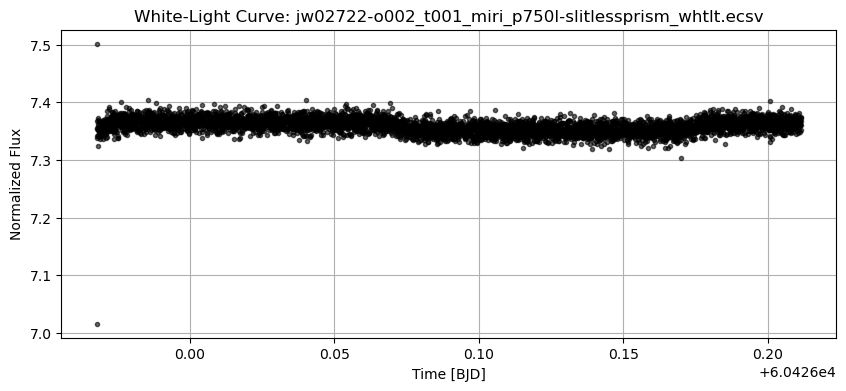


🔹 Plotting: jw02722-o003_t001_niriss_clear-gr700xd-substrip256_whtlt.ecsv
['MJD', 'whitelight_flux']


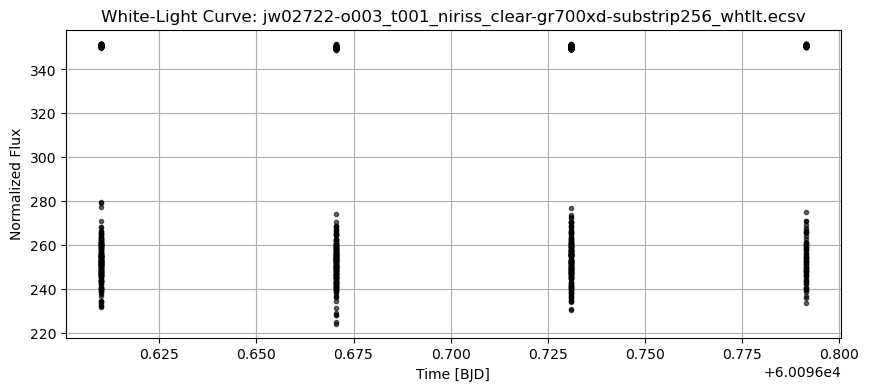


🔹 Plotting: jw02722-o004_t001_miri_p750l-slitlessprism_whtlt.ecsv
['MJD', 'whitelight_flux']


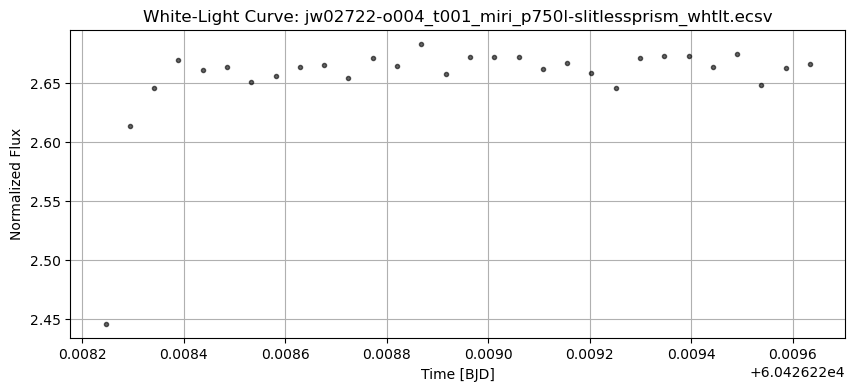

In [2]:
# Load all ECSV white-light files
whtlt_files = [
    'jw02722-o002_t001_miri_p750l-slitlessprism_whtlt.ecsv',
    'jw02722-o003_t001_niriss_clear-gr700xd-substrip256_whtlt.ecsv',
    'jw02722-o004_t001_miri_p750l-slitlessprism_whtlt.ecsv'
]

for fname in whtlt_files:
    print(f"\n🔹 Plotting: {fname}")
    tbl = Table.read(fname, format='ascii.ecsv')
    print(tbl.colnames)
    time = tbl['MJD']
    flux = tbl['whitelight_flux']
    flux_err = np.zeros_like(flux)  # if no error column is present

    plt.figure(figsize=(10, 4))
    plt.errorbar(time, flux, yerr=flux_err, fmt='.k', alpha=0.6)
    plt.title(f"White-Light Curve: {fname}")
    plt.xlabel("Time [BJD]")
    plt.ylabel("Normalized Flux")
    plt.grid(True)
    plt.show()

## Pregled izdvojenih spektara (x1dints.fits fajlovi)

FITS fajl jw02722-o002_t001_miri_p750l-slitlessprism_x1dints.fits je standardni proizvod JWST MIRI instrumenta za 1D ekstraktovane spektre po ekspoziciji (x1dints = extracted 1D spectra per integration).

Šta fajl sadrži:
Instrument: MIRI (Mid-Infrared Instrument)

Mod posmatranja: P750L slitless prism – srednje-infracrveni spektar, bez uskog proreza

Sadržaj: 1D spektri za svaku integraciju u nizu ekspozicija

Ključni delovi FITS fajla:
Primary HDU (Header/Data Unit)

Ne sadrži direktne podatke, već samo osnovne metapodatke (npr. posmatrački program, vreme, cilj).

Ovde se nalaze opšti podaci o instrumentu, verziji softvera, koordinatama cilja i vremenu posmatranja.

Extension 1: SCI (spektroskopski podaci)

Glavni deo fajla sa numeričkim vrednostima.

Uključuje kolone kao što su:

WAVELENGTH – talasne dužine u mikronima

FLUX – intenzitet signala u funkciji talasne dužine (f_lambda)

ERROR – greška (nesigurnost) merenja

BKGD – pozadinski nivo signala

DQ – data quality maska

Struktura:

Svaki red u tabeli odgovara jednoj vremenskoj integraciji tokom posmatranja.

Koristi se za pravljenje time-resolved spectra i za analizu varijacija u atmosferi tokom tranzita planete.

Upotreba:
Ovi podaci su ključni za generisanje transmission spectra egzoplaneta poput K2-18b. Omogućavaju uvid u prisustvo molekula u atmosferi na osnovu karakterističnih apsorpcionih linija u infracrvenom spektru.


jw02722-o003_t001_niriss_clear-gr700xd-substrip256_x1dints.fits
Instrument: NIRISS (Near Infrared Imager and Slitless Spectrograph)

Režim rada: CLEAR/GR700XD, SUBSTRIP256 – koristi grating i disperziju za dobijanje spektara

Tip fajla: x1dints – 1D ekstraktovani spektri po pojedinačnim integracijama


jw02722-o004_t001_miri_p750l-slitlessprism_x1dints.fits
Instrument: MIRI (Mid-Infrared Instrument)

Režim rada: P750L slitless prism – srednje-infracrveni spektar bez proreza

Tip fajla: x1dints – 1D spektri po integraciji za Visit 2


🔍 Inspecting: jw02722-o002_t001_miri_p750l-slitlessprism_x1dints.fits
wave shape: (388,)
flux shape: (388,)


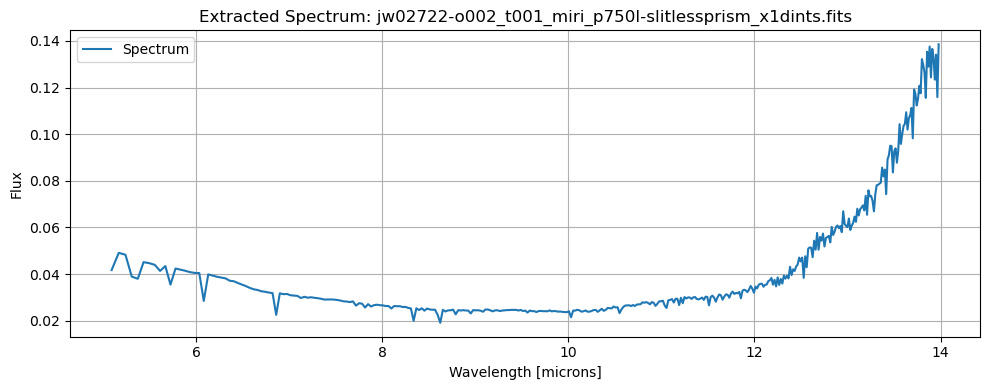

In [3]:
x1d_files = [
    'jw02722-o002_t001_miri_p750l-slitlessprism_x1dints.fits',
    'jw02722-o003_t001_niriss_clear-gr700xd-substrip256_x1dints.fits',
    'jw02722-o004_t001_miri_p750l-slitlessprism_x1dints.fits'
]



import matplotlib.pyplot as plt
from astropy.io import fits
import glob

x1d_files = glob.glob("jw02722-o002_t001_miri_p750l-slitlessprism_x1dints.fits")

for f in x1d_files:
    print(f"\n🔍 Inspecting: {f}")
  
    with fits.open(f) as hdul:
        # Find HDU with WAVELENGTH and FLUX
        target_hdu_index = None
        for i, hdu in enumerate(hdul):
            if hasattr(hdu, 'columns'):
                colnames = hdu.columns.names
                if 'WAVELENGTH' in colnames and 'FLUX' in colnames:
                    target_hdu_index = i
                    break
        
        if target_hdu_index is None:
            print("❌ No HDU with 'WAVELENGTH' and 'FLUX' found.")
            continue

        data = hdul[target_hdu_index].data
        wave = data['WAVELENGTH']
        flux = data['FLUX']

        print("wave shape:", wave.shape)
        print("flux shape:", flux.shape)

        # Plot the 1D spectrum
        plt.figure(figsize=(10, 4))
        plt.plot(wave, flux, label='Spectrum')
        plt.xlabel("Wavelength [microns]")
        plt.ylabel("Flux")
        plt.title(f"Extracted Spectrum: {f}")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()


## Procena parametara planete

In [4]:
# This is a basic template for fitting a transit model
# Advanced users can use batman, exoplanet, or PyMC for real fits

# Example: Estimate transit depth from white-light curve
from astropy.table import Table
import numpy as np

# Read white-light curve ECSV file
tbl = Table.read(whtlt_files[0], format='ascii.ecsv')
flux = tbl['whitelight_flux']

# Estimate transit depth (simple method)
depth = 1 - np.nanmin(flux)
print(f"🔎 Estimated transit depth: {depth:.4f} or {depth*1e6:.1f} ppm")
print("Note: Use dedicated transit modeling tools for precise parameters.")

🔎 Estimated transit depth: -6.0160 or -6015992.7 ppm
Note: Use dedicated transit modeling tools for precise parameters.
